In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'cv2'

In [6]:
background = np.load("background.npy")
wine_glass = np.load("wineglass.npy")

## def process_image

In [18]:
def process_image(frame):
    """Standard method of processing images for Sketch It"""
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray_blur = cv2.GaussianBlur(frame_gray, (5,5),0)
    return(frame_gray_blur)

NameError: name 'cv2' is not defined

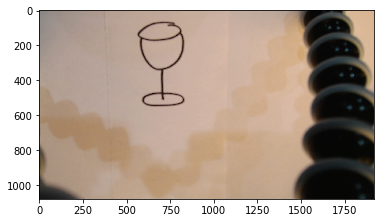

In [19]:
plt.imshow(wine_glass)
processed_wine_glass = process_image(wine_glass)

# Using PIL method

In [9]:
pil_image = Image.fromarray(wine_glass)
pil_image = pil_image.convert('L')

#convert to array for thresholding(theres probably a way to do this in an image)
frame_array = np.array(pil_image)
frame_array = np.where(frame_array <= 100,0,frame_array)
frame_array = np.where(frame_array > 100, 255, frame_array)

#turn back into an image, subtract from 255 to normalize with dataset, then resize image with BICUBIC sampling and turn into an array
resized_image = Image.fromarray(frame_array)
test_array = np.array(resized_image.resize((28,28), Image.BICUBIC))

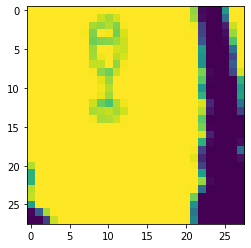

In [13]:
plt.imshow(test_array)